# DICISION TREE

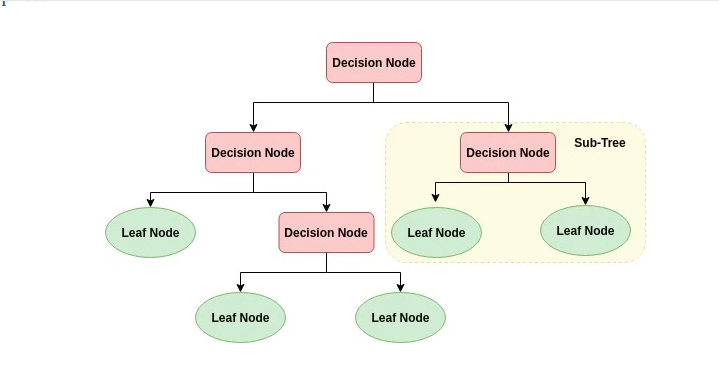
- All Internal node represents feature or attributes
- leaf node represents a outcome
- It is a white box type of ML Learning
- can handle high dimensional data eith good accuraccy


Steps
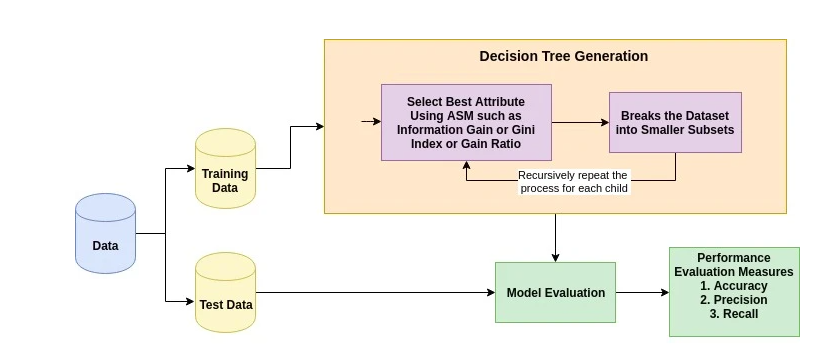
- select the best attr using ASM(attr Selection Measures) such as 
    - Information Gain (Entropy)
    - Gini Index

- Breaks the datasets into smaller subsets

- Repeat until following condition match
    - All the tuples belong to same atttr value
    - no more remaining attr
    - no more instances


- ASM
    - Splitting rules
    - partition the data into best possible manner
    
 
- Entropy(Information gain)
    - It is  measure of Uncertaintity / ramdomness
    - select attr of maximum Gain
    - select this attr as decision node
    

- Gini Index
    - It is  measure of impurity of each attr
    - select attr of minimum impurity
    - select this attr as decision node
    

- Pros
    - Easy to interpret and visualize
    - It can easily capture non linear pattern
    
    
- Cons
    - Sensitive to noisy data
    - It can Overfit noisy data
    - Biased with Imbalanced data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\Python\Datasets\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
X = df.drop('Class',axis = 1)
Y = df.Class
print(X.shape,Y.shape)

(284807, 30) (284807,)


In [10]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DTC = DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)

In [22]:
from sklearn import metrics
import seaborn as sns

Accuracy: 0.9993399061824106
Cls Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.78      0.83      0.80       117

    accuracy                           1.00     71202
   macro avg       0.89      0.91      0.90     71202
weighted avg       1.00      1.00      1.00     71202



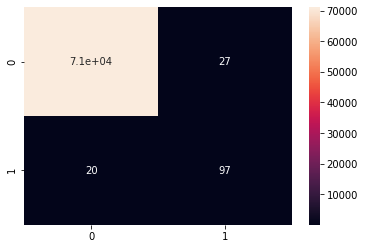

In [24]:
# Model Evaluation
print('Accuracy:',metrics.accuracy_score(ytest,ypred))
# print('Confusion Metrc:',metrics.confusion_matrix(ytest,ypred))
sns.heatmap(metrics.confusion_matrix(ytest,ypred),annot = True)
print('Cls Report:',metrics.classification_report(ytest,ypred))


# Optimizing Decision Tree Performance

In [26]:
# entropy ---> Information gain
# gini     ---> gini Index
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=3)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)

Accuracy: 0.9994522625768939
Cls Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.81      0.86      0.84       117

    accuracy                           1.00     71202
   macro avg       0.91      0.93      0.92     71202
weighted avg       1.00      1.00      1.00     71202



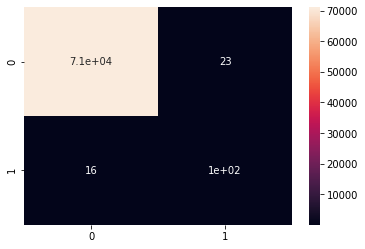

In [27]:
# Model Evaluation
print('Accuracy:',metrics.accuracy_score(ytest,ypred))
# print('Confusion Metrc:',metrics.confusion_matrix(ytest,ypred))
sns.heatmap(metrics.confusion_matrix(ytest,ypred),annot = True)
print('Cls Report:',metrics.classification_report(ytest,ypred))


# Tuning parameters

In [40]:
criterion = ["gini", "entropy"]
# splitter = ["best", "random"]
max_depth = list(range(1,5))
# max_features =["auto", "sqrt", "log2"]
grid = {'criterion':criterion,'max_depth':max_depth}

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
# cv
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid,cv=cv,scoring='accuracy')
res = grid_cv.fit(xtrain,ytrain)


# help(DecisionTreeClassifier())

In [42]:
print(res.best_params_)
print(res.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.9993040112981126
